# Projet de fin de majeure : Super résolution
#### Johanna Dubos, Zoé Ducourau & Dimitri Szezurek
---

In [2]:
# Librairies
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tkinter
import os
import shutil


In [12]:
shutil.rmtree('BDD')
os.makedirs('BDD')

#### Image considérée (échelle de Monoyer)

Taille de l'image : Hauteur =  943 || Largeur =  768


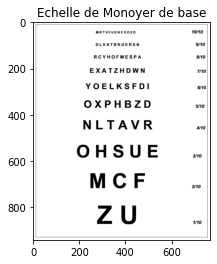

In [13]:
filename = 'Echelle-Monoyer.png'

IMAGE_nb = cv2.imread(filename,0)
[H,W] = IMAGE_nb.shape

print("Taille de l'image : Hauteur = ", H, "|| Largeur = " , W)

plt.imshow(IMAGE_nb,cmap='gray')
plt.title('Echelle de Monoyer de base')
plt.show()

#### Création de la BDD avec N images (déformées, floutées, sous-échantillonées & bruitées)

In [14]:
N = 30 # Nb d'images dans la BDD

for i in range (1,N):
    img_translated = cv2.warpAffine(IMAGE_nb, np.float32([[1,0,np.random.randint(W/2)],[0,1,np.random.randint(H/2)]]),(2*W,2*H)) # Translation
    angle=np.random.randint(-10,10)
    M = cv2.getRotationMatrix2D((W/2,H/2), angle, 1) # Matrice de rotation
    img_rotated = cv2.warpAffine(img_translated,M,(2*W,2*H)) # Rotation
    img_blurred = cv2.blur(img_rotated,(5,5))   # Floutage 
    img_downsampled = cv2.pyrDown(cv2.pyrDown(img_blurred)) # Sous-échantillonnage /4

    # Ajout d'un bruit gaussien 
    gauss = np.random.normal(0,5,img_downsampled.shape)
    gauss = gauss.reshape(img_downsampled.shape)
    img_noisy = img_downsampled + gauss

    plt.imsave("BDD/imageBR_"+str(i)+".png",img_noisy,cmap='gray')

#### Différentes étapes :
- Recalage/estimation du mouvements des images BR
- Estimation du flou des images BR
- Sélection d'un a priori convenable
- Estimation d'une image HR
